6. Using KNN algorithm, predict which category a customer belongs to on the basis of the data provided by a telecommunications firm. Find the accuracy of the KNN algorithm in predicting the category of a customer.

Dataset: teleCust.csv

In [11]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv('teleCust.csv')
X = data.drop('custcat', axis=1)
y = data['custcat']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# taking k as user input 
n=int(input("Enter the number of neighbors (k): "))

# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)

# Evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy*100:.4f}")

KNN Accuracy: 38.0000


This Jupyter Notebook implements a **K-Nearest Neighbors (KNN)** algorithm to predict customer categories based on a dataset provided by a telecommunications firm. Below is a detailed explanation of the code and its components.

---

## **1. Problem Statement**
The goal is to predict which category a customer belongs to using the KNN algorithm. The dataset used is `teleCust.csv`, which contains customer data. The target variable is `custcat`, representing the customer category.

---

## **2. Code Breakdown**

### **2.1 Importing Libraries**


In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

- **pandas**: For loading and manipulating the dataset.
- **scikit-learn**:
  - `KNeighborsClassifier`: Implements the KNN algorithm.
  - `train_test_split`: Splits the dataset into training and testing sets.
  - `StandardScaler`: Scales features for better performance of KNN.
  - `accuracy_score`: Evaluates the accuracy of the model.
  - `confusion_matrix`: Generates a confusion matrix for evaluation.
- **matplotlib** and **seaborn**: For visualizing results.

---

### **2.2 Loading and Preparing the Data**


In [2]:
data = pd.read_csv('teleCust.csv')
X = data.drop('custcat', axis=1)
y = data['custcat']

- The dataset is loaded using `pd.read_csv()`.
- `X` contains the independent variables (features), which are all columns except `custcat`.
- `y` contains the target variable (`custcat`), representing customer categories.

---

### **2.3 Splitting the Data**


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- The dataset is split into training (80%) and testing (20%) sets using `train_test_split()`.
- `random_state=42` ensures reproducibility of the split.

---

### **2.4 Feature Scaling**


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- **Why Scaling?** KNN is a distance-based algorithm, so features with larger ranges can dominate the distance calculation. Scaling ensures all features contribute equally.
- `StandardScaler` standardizes features by removing the mean and scaling to unit variance.

---

### **2.5 User Input for K**


In [5]:
n = int(input("Enter the number of neighbors (k): "))

- The user is prompted to input the number of neighbors (`k`) for the KNN algorithm.

---

### **2.6 Training the KNN Model**


In [6]:
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

- A `KNeighborsClassifier` object is created with the specified `n_neighbors` (user input).
- The model is trained using the `fit()` method on the training data (`X_train` and `y_train`).

---

### **2.7 Making Predictions and Evaluating the Model**


In [7]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy*100:.4f}")

KNN Accuracy: 35.0000


- The model predicts the categories for the test data (`X_test`) using `predict()`.
- The accuracy of the model is calculated using `accuracy_score()`, which compares the predicted values (`y_pred`) with the actual values (`y_test`).

---

### **2.8 Visualizations**

#### **2.8.1 Elbow Curve (Accuracy vs. K-value)**


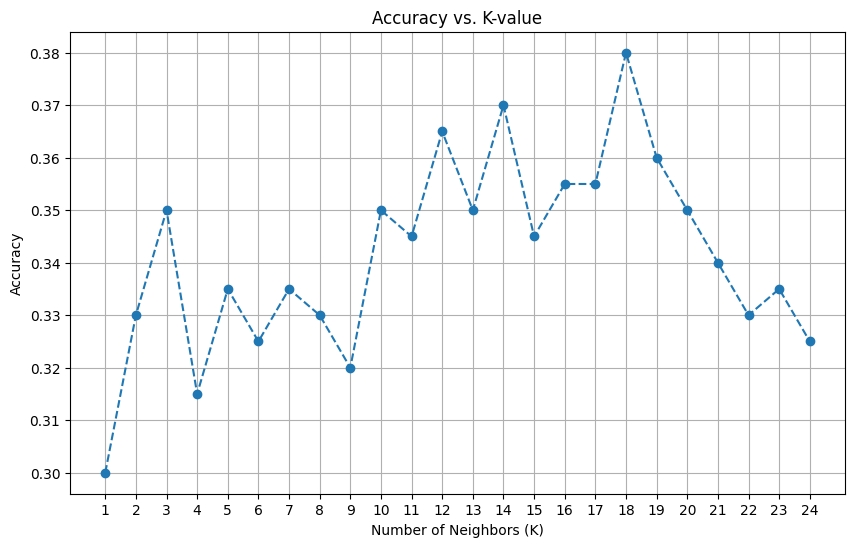

In [8]:
k_values = range(1, 25)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.title('Accuracy vs. K-value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

- The model is trained and evaluated for different values of `k` (from 1 to 24).
- The accuracy for each `k` is stored in the `accuracies` list.
- A line plot is generated to visualize the relationship between `k` and accuracy.
- **Purpose**: Helps identify the optimal value of `k` (the "elbow point").

---

#### **2.8.2 Confusion Matrix Heatmap**


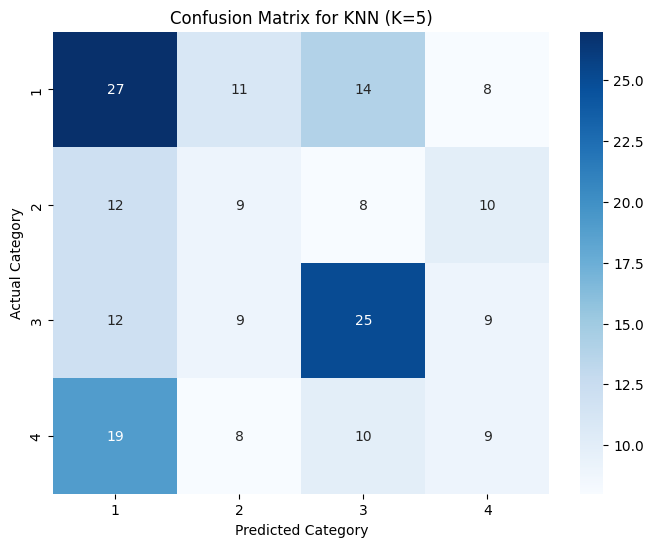

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix for KNN (K=5)')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()

- A confusion matrix is generated using `confusion_matrix()`.
- A heatmap is plotted using `seaborn` to visualize the confusion matrix.
- **Purpose**: Provides insights into the model's classification performance (e.g., misclassifications).

---

#### **2.8.3 Actual vs. Predicted Categories**


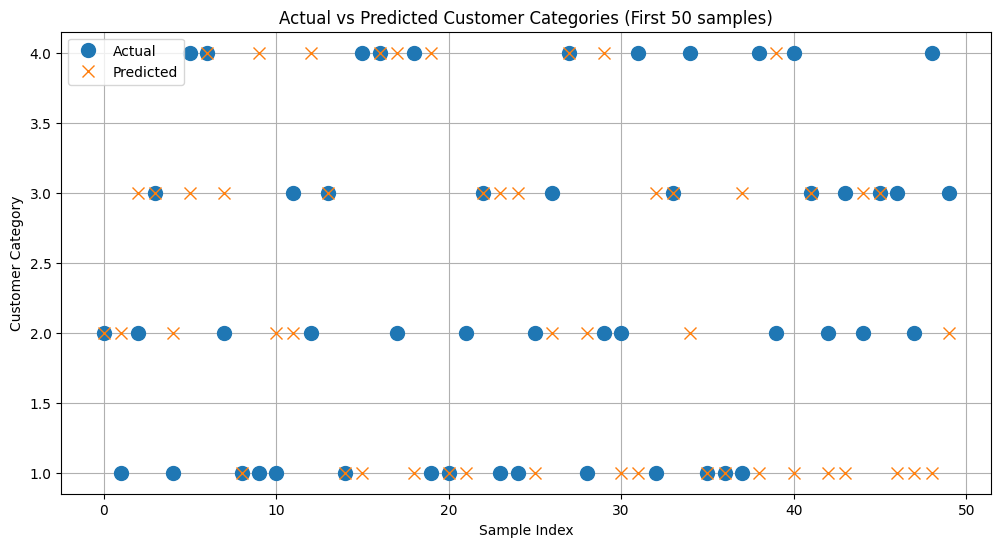

In [10]:
plt.figure(figsize=(12, 6))
sample_size = 50
plt.plot(y_test.values[:sample_size], 'o', label='Actual', markersize=10)
plt.plot(y_pred[:sample_size], 'x', label='Predicted', markersize=8)
plt.title(f'Actual vs Predicted Customer Categories (First {sample_size} samples)')
plt.xlabel('Sample Index')
plt.ylabel('Customer Category')
plt.legend()
plt.grid(True)
plt.show()

- The first 50 samples of actual and predicted categories are plotted.
- **Purpose**: Visualizes how well the model predicts customer categories for a subset of the data.

---

## **3. Key Outputs**
1. **Accuracy**: The accuracy of the KNN model is printed.
2. **Elbow Curve**: Helps determine the optimal value of `k`.
3. **Confusion Matrix**: Evaluates the model's classification performance.
4. **Actual vs. Predicted Plot**: Visualizes the model's predictions for a subset of the data.

---

## **4. Summary**
This notebook provides a complete workflow for using the KNN algorithm to classify customers into categories. It includes:
- Data preprocessing (splitting and scaling).
- Training and evaluating the KNN model.
- Visualizing results to analyze model performance.

The notebook is interactive, allowing the user to specify the number of neighbors (`k`) and explore the impact of different `k` values on accuracy.

KNN Accuracy: 0.3350


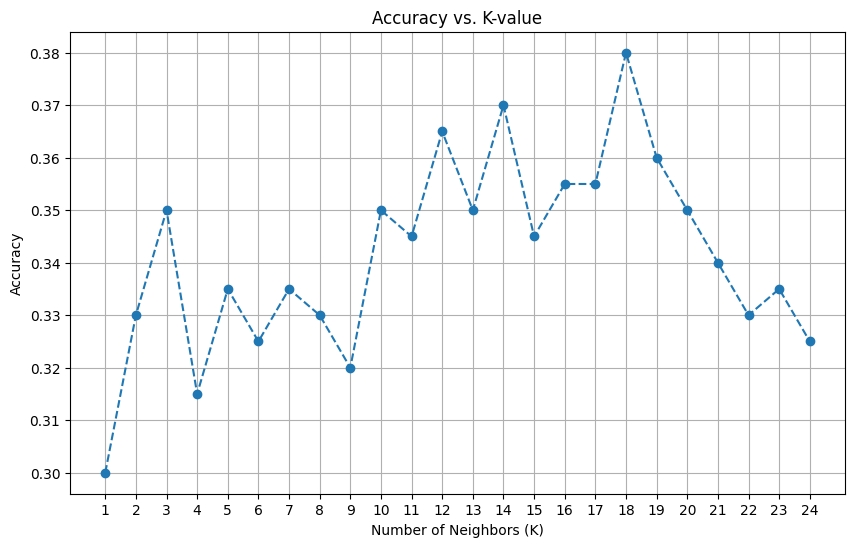

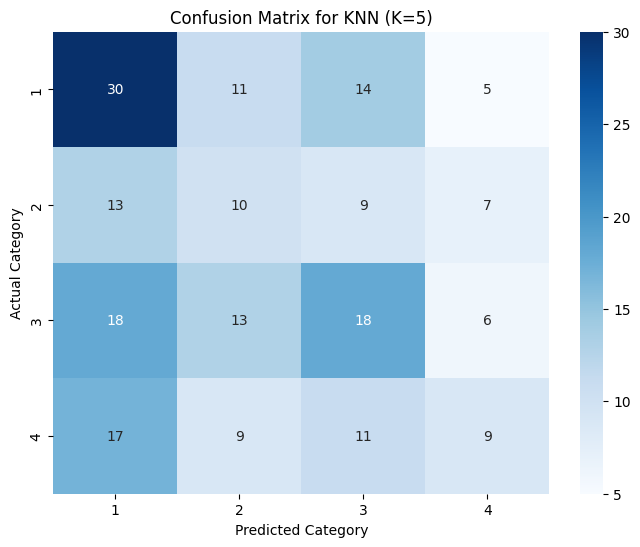

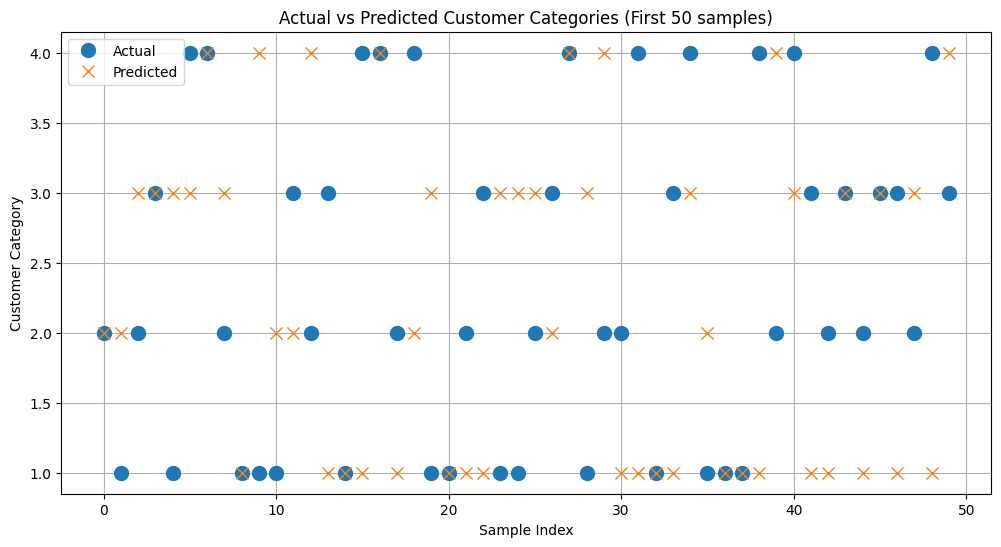

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
data = pd.read_csv('teleCust.csv')
X = data.drop('custcat', axis=1)
y = data['custcat']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")

# Visualization 1: Accuracy vs. K-value (Elbow Curve)
k_values = range(1, 25)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.title('Accuracy vs. K-value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Visualization 2: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix for KNN (K=5)')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()

# Visualization 3: Actual vs Predicted (sample of 50 points)
plt.figure(figsize=(12, 6))
sample_size = 50
plt.plot(y_test.values[:sample_size], 'o', label='Actual', markersize=10)
plt.plot(y_pred[:sample_size], 'x', label='Predicted', markersize=8)
plt.title(f'Actual vs Predicted Customer Categories (First {sample_size} samples)')
plt.xlabel('Sample Index')
plt.ylabel('Customer Category')
plt.legend()
plt.grid(True)
plt.show()